# CIC_IDS_2018_preprocessed_data

In [32]:
"Cyber Security latest dataset".center(100, "*").upper()

'***********************************CYBER SECURITY LATEST DATASET************************************'

## The workflow that we will guide us

In [33]:
workflow = [ 
             "    1.   import the libraries for Exploratory Analysis",
             "    1.1. import the dataset",
             "    2.   check shape",
             "    3.   check data types",
             "    4.   check Null values",
             "    5.   Check duplicate",
             "    6.   Split data into X and y",
             "    7.   Preprocessing",
                        " 7.1.    import classifier",
                        " 7.2     import and set random seed",
                        " 7.3     import train_test_split",
                        " 7.4     fit and train ",
                        " 7.5     score and predict",
                        " 7.6     save model with pickle or joblib"
         ]


In [3]:
workflow

['    1.   import the libraries for Exploratory Analysis',
 '    1.1. import the dataset',
 '    2.   check shape',
 '    3.   check data types',
 '    4.   check Null values',
 '    5.   Check duplicate',
 '    6.   Split data into X and y',
 '    7.   Preprocessing',
 ' 7.1.    import classifier',
 ' 7.2     import and set random seed',
 ' 7.3     import train_test_split',
 ' 7.4     fit and train ',
 ' 7.5     score and predict',
 ' 7.6     save model with pickle or joblib']

In [4]:
workflow[0]

'    1.   import the libraries for Exploratory Analysis'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dython
import pickle
import joblib
from datetime import datetime
from dateutil import parser
from dython.nominal import associations

## Import the dataset

In [6]:
print(workflow[1])
cyber = pd.read_csv(r"C:\Users\godwi\GitHub\Canadian-Cyber-Attack-Anomaly-detection-Scikit-Learn\cic_ids_2018.csv")
cyber.head()

    1.1. import the dataset


,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,3389,1665875,8,7,1128,1581.0,661,0,141.00,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,53,67765,2,2,94,268.0,47,47,47.00,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,0,213190,5,0,0,0.0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,41967,86370853,2,0,0,0.0,0,0,0.00,...,20,0.0,0.0,0.0,0.0,86400000.0,0.0,86400000.0,86400000.0,Benign
4,4,80,5113386,4,4,97,231.0,97,0,24.25,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## The Shape of the dataset

In [7]:
cyber.shape

(246730, 74)

## Info about the dataset

In [8]:
cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246730 entries, 0 to 246729
Data columns (total 74 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         246730 non-null  int64  
 1   Dst Port           246730 non-null  int64  
 2   Flow Duration      246730 non-null  int64  
 3   Tot Fwd Pkts       246730 non-null  int64  
 4   Tot Bwd Pkts       246730 non-null  int64  
 5   TotLen Fwd Pkts    246730 non-null  int64  
 6   TotLen Bwd Pkts    246730 non-null  float64
 7   Fwd Pkt Len Max    246730 non-null  int64  
 8   Fwd Pkt Len Min    246730 non-null  int64  
 9   Fwd Pkt Len Mean   246730 non-null  float64
 10  Fwd Pkt Len Std    246730 non-null  float64
 11  Bwd Pkt Len Max    246730 non-null  int64  
 12  Bwd Pkt Len Min    246730 non-null  int64  
 13  Bwd Pkt Len Mean   246730 non-null  float64
 14  Bwd Pkt Len Std    246730 non-null  float64
 15  Flow IAT Mean      246730 non-null  float64
 16  Fl

## The data types

In [9]:
cyber.dtypes

Unnamed: 0         int64
Dst Port           int64
Flow Duration      int64
Tot Fwd Pkts       int64
Tot Bwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max         float64
Idle Min         float64
Label             object
Length: 74, dtype: object

## Checking for Null values

In [10]:
cyber.isna().sum()

Unnamed: 0       0
Dst Port         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 74, dtype: int64

## Lets work on dropping columns that have only 0s as values , or making them NaN to drop them

In [11]:
start = []
for col in cyber.columns:
        if col[:7] == "Bwd IAT": 
                start.append(col)
print(start)

['Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min']


## Filling with np.nan

In [12]:
# lets fillna so we can remove blanck columns by dropping
cyber = cyber.replace(0, np.nan)

## Dropping the columns that have only NaNs all through

In [13]:
cyber.dropna(how = "all", axis =1,inplace = True )
cyber.fillna(0, inplace = True)
cyber.head()

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,3389.0,1665875.0,8,7.0,1128.0,1581.0,661.0,0.0,141.00,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1.0,53.0,67765.0,2,2.0,94.0,268.0,47.0,47.0,47.00,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2.0,0.0,213190.0,5,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3.0,41967.0,86370853.0,2,0.0,0.0,0.0,0.0,0.0,0.00,...,20.0,0.0,0.0,0.0,0.0,86400000.0,0.0,86400000.0,86400000.0,Benign
4,4.0,80.0,5113386.0,4,4.0,97.0,231.0,97.0,0.0,24.25,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [14]:
cyber.dropna(how = "all", axis =0,inplace = True )
cyber.shape

(246730, 66)

## Investigating feature correlations and dropping columns with very high correlation (based on inspection of heatmap)

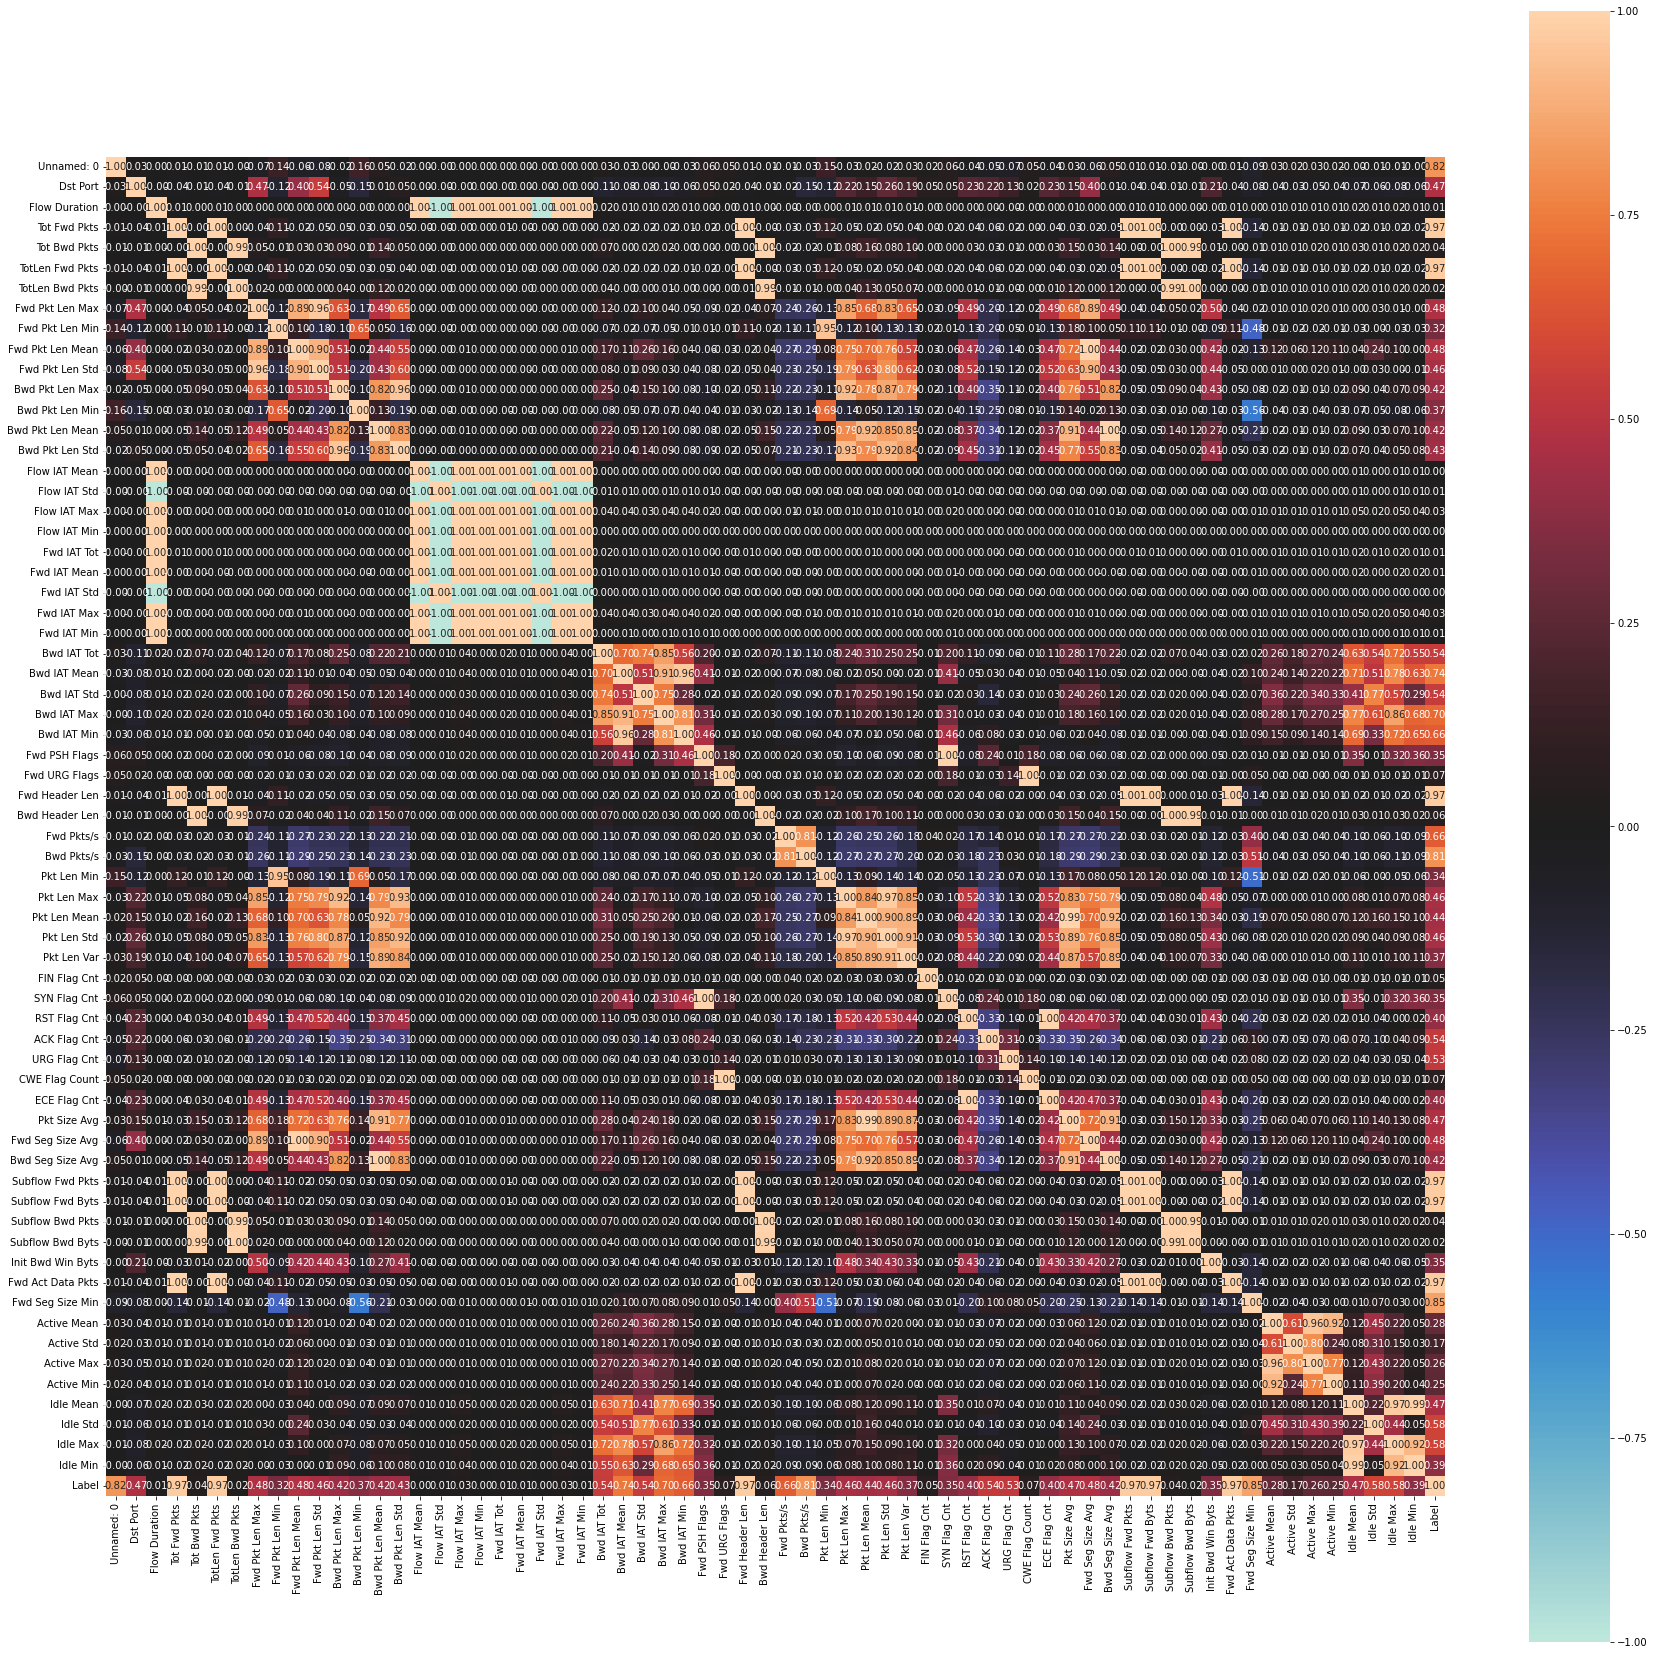

{'corr':                Unnamed: 0  Dst Port  Flow Duration  Tot Fwd Pkts  \
 Unnamed: 0       1.000000  0.030505       0.002931      0.014275   
 Dst Port         0.030505  1.000000      -0.001380     -0.036862   
 Flow Duration    0.002931 -0.001380       1.000000      0.006617   
 Tot Fwd Pkts     0.014275 -0.036862       0.006617      1.000000   
 Tot Bwd Pkts    -0.006044 -0.010554       0.001283     -0.001890   
 ...                   ...       ...            ...           ...   
 Idle Mean       -0.002969 -0.069086       0.015150     -0.020342   
 Idle Std        -0.012381 -0.063116       0.010404     -0.012120   
 Idle Max        -0.007826 -0.078819       0.016484     -0.021609   
 Idle Min        -0.001101 -0.059642       0.013656     -0.018685   
 Label            0.818009  0.471794       0.012301      0.971994   
 
                Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
 Unnamed: 0        -0.006044         0.014276        -0.001478   
 Dst Port          -0.010554  

In [15]:
associations(cyber, figsize=(30,30))

### Let choose columns that has a correlation of  0.2 to 0.7

corr = cyber.corr()
kot = corr[(corr == 0) ]
associations(kot.corr(),figsize=(30,30))

# let select all the columns from the heatmap
print([col for col in kot])

In [16]:
X= cyber.drop(['Label',"Unnamed: 0"], axis =1)
y =cyber["Label"]

## Training , Fiiting 

## Train and test with seed

In [17]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

np.random.seed(32)
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
sgd.fit(X_train, y_train)
print(f'Training score with SGDClassifier : {  round(sgd.score(X_train,y_train)*100,2)}%')
print(f'Test accuracy score with SGDClassifier :{round(sgd.score(X_test,y_test)*100,2)}%')

np.random.seed(32)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs=2)
clf.fit(X_train, y_train)

print(f'Training score with RandomForestClassifier : { round(clf.score(X_train,y_train)*100,2)}%')
print(f'Test accuracy score with RandomForestClassifier :{round(clf.score(X_test,y_test)*100,2)}%')

In [18]:
from sklearnex import patch_sklearn 


In [19]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [20]:

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn import svm
from sklearn.metrics import f1_score, recall_score, precision_score

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=3000)
clf = RandomForestClassifier(n_estimators=100, n_jobs=2)
#svm = svm.SVC()

sgd.fit(X_train, y_train)
clf.fit(X_train, y_train)
# svm.fit(X_train, y_train)
# The shape is above 240,000
training_Score_SGD = sgd.score(X_train, y_train)
training_Score_CLF = clf.score(X_train, y_train)
# training_Score_SVM = svm.score(X_train, y_train)
test_Accuracy_Score_SGD = sgd.score(X_test, y_test)
test_Accuracy_Score_CLF = clf.score(X_test, y_test)
# test_Accuracy_Score_SVM = svm.score(X_test, y_test)

print (f'Training SGD score = {training_Score_SGD *100:.2f}%')
print (f'Test Accuracy SGD score = {test_Accuracy_Score_SGD *100:.2f}%')
print()
print (f'Training CLF score = {training_Score_CLF *100:.2f}%')
print (f'Test Accuracy CLF score = {test_Accuracy_Score_CLF *100:.2f}%')
print()
#print (f'Training SVM score = {test_Accuracy_Score_SVM *100:.2f}%')
#print (f'Test Accuracy SVM score = {test_Accuracy_Score_SVM *100:.2f}%')


c:\Users\godwi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Training SGD score = 37.36%
Test Accuracy SGD score = 37.25%

Training CLF score = 93.81%
Test Accuracy CLF score = 86.21%



## Predicting with X_test with the RandomForest clf model , which scored better than SGD classifier

In [21]:
y_preds = clf.predict(X_test)
y_preds[:20]

array(['DDOS attack-HOIC', 'Bot', 'DoS attacks-Slowloris', 'Benign',
       'SSH-Bruteforce', 'Benign', 'Benign', 'Benign', 'Infilteration',
       'Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk',
       'DDOS attack-HOIC', 'Infilteration', 'Benign', 'Infilteration',
       'Benign', 'Bot', 'Benign', 'SSH-Bruteforce'], dtype=object)

## The evaluation Matrices

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy_score(y_test, y_preds)

0.8621367486726381

### Classification Report

In [23]:
print(classification_report(y_test, y_preds))

                          precision    recall  f1-score   support

                  Benign       0.84      0.82      0.83     14997
                     Bot       1.00      1.00      1.00      3921
        DDOS attack-HOIC       0.99      1.00      0.99      3061
    DDOS attack-LOIC-UDP       1.00      1.00      1.00       340
   DoS attacks-GoldenEye       1.00      1.00      1.00      2926
        DoS attacks-Hulk       1.00      1.00      1.00      4037
DoS attacks-SlowHTTPTest       0.72      0.98      0.83      3999
   DoS attacks-Slowloris       1.00      1.00      1.00      2052
          FTP-BruteForce       0.95      0.48      0.64      2973
           Infilteration       0.67      0.70      0.69      8024
          SSH-Bruteforce       1.00      1.00      1.00      3016

                accuracy                           0.86     49346
               macro avg       0.92      0.91      0.91     49346
            weighted avg       0.87      0.86      0.86     49346



In [24]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[12244,     1,    28,     0,     1,     0,     0,     0,     0,
         2723,     0],
       [    0,  3921,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    3,     0,  3058,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,   340,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,  2924,     1,     0,     1,     0,
            0,     0],
       [    0,     0,     0,     0,     1,  4036,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,  3918,     0,    81,
            0,     0],
       [    0,     0,     0,     0,     1,     0,     0,  2051,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,  1551,     0,  1422,
            0,     0],
       [ 2400,     0,    11,     0,     0,     0,     0,     0,     0,
         5613,     0],
       [    0,     0,     0,     0,     0,     0,     0,    

## making a dataframe of the confusion matrix

In [25]:
cmd = pd.DataFrame(cm, columns = (['Benign', 'Bot', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP',
       'DoS attacks-GoldenEye',"DoS attacks-Hulk","DoS attacks-SlowHTTPTest","DoS attacks-Slowloris","FTP-BruteForce"\
              ,"Infilteration","SSH-Bruteforce"]), index =(['Benign', 'Bot', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP',
       'DoS attacks-GoldenEye',"DoS attacks-Hulk","DoS attacks-SlowHTTPTest","DoS attacks-Slowloris","FTP-BruteForce"\
              ,"Infilteration","SSH-Bruteforce"] ))
cmd 

,Benign,Bot,DDOS attack-HOIC,DDOS attack-LOIC-UDP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,DoS attacks-Slowloris,FTP-BruteForce,Infilteration,SSH-Bruteforce
Benign,12244,1,28,0,1,0,0,0,0,2723,0
Bot,0,3921,0,0,0,0,0,0,0,0,0
DDOS attack-HOIC,3,0,3058,0,0,0,0,0,0,0,0
DDOS attack-LOIC-UDP,0,0,0,340,0,0,0,0,0,0,0
DoS attacks-GoldenEye,0,0,0,0,2924,1,0,1,0,0,0
DoS attacks-Hulk,0,0,0,0,1,4036,0,0,0,0,0
DoS attacks-SlowHTTPTest,0,0,0,0,0,0,3918,0,81,0,0
DoS attacks-Slowloris,0,0,0,0,1,0,0,2051,0,0,0
FTP-BruteForce,0,0,0,0,0,0,1551,0,1422,0,0
Infilteration,2400,0,11,0,0,0,0,0,0,5613,0


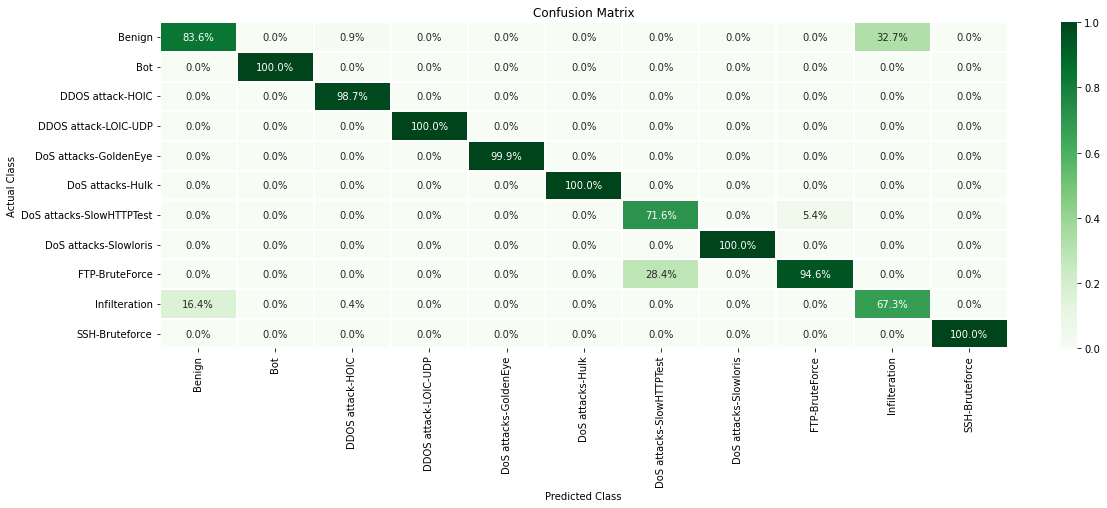

In [48]:
fig, ax = plt.subplots(figsize = (19,6))
sns.heatmap(cmd/np.sum(cmd), fmt= '.1%' ,linewidth=0.3, cmap = 'Greens',xticklabels = True, annot =True)
ax.set(title = 'Confusion Matrix', xlabel = 'Predicted Class', ylabel = 'Actual Class');

## Saving the model with joblib


In [60]:
import joblib
print(f"Model is now saved !!".center(50,"*"))
print(f' Saving the predictive models as: {joblib.dump(clf, "model.joblib")}')
print(f"Model is now saved !!".center(50,"*"))

**************Model is now saved !!***************
 Saving the predictive models as: ['model.joblib']
**************Model is now saved !!***************
